In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import polars as pl
train = pl.read_parquet('../input/otto-train-and-test-data-for-local-validation/train.parquet')
validA = pl.read_parquet('../input/otto-train-and-test-data-for-local-validation/test.parquet')
validB = pl.read_parquet('../input/otto-train-and-test-data-for-local-validation/test_labels.parquet')

In [3]:
import numpy as np
import pandas as pd

# Get subset of data 
fraction_of_sessions = 0.2

train_sessions = train['session'].sample(fraction=fraction_of_sessions, seed=42)
train = train.filter(pl.col("session").is_in(train_sessions))
train = train.sort("session")

validation_sessions = validA['session'].sample(fraction=fraction_of_sessions, seed=42)
validA = validA.filter(pl.col("session").is_in(validation_sessions))
validA = validA.sort("session")

validB = validB.filter(pl.col("session").is_in(validation_sessions))
validB = validB.sort("session")

In [4]:
print(train, validA, validB)

shape: (152_268_691, 4)
┌──────────┬─────────┬────────────┬──────┐
│ session  ┆ aid     ┆ ts         ┆ type │
│ ---      ┆ ---     ┆ ---        ┆ ---  │
│ i32      ┆ i32     ┆ i32        ┆ u8   │
╞══════════╪═════════╪════════════╪══════╡
│ 0        ┆ 1517085 ┆ 1659304800 ┆ 0    │
│ 0        ┆ 1563459 ┆ 1659304904 ┆ 0    │
│ 0        ┆ 1309446 ┆ 1659367439 ┆ 0    │
│ 0        ┆ 16246   ┆ 1659367719 ┆ 0    │
│ …        ┆ …       ┆ …          ┆ …    │
│ 11098496 ┆ 219035  ┆ 1661119183 ┆ 0    │
│ 11098507 ┆ 1195266 ┆ 1661119189 ┆ 0    │
│ 11098512 ┆ 8664    ┆ 1661119192 ┆ 0    │
│ 11098522 ┆ 1524949 ┆ 1661119197 ┆ 0    │
└──────────┴─────────┴────────────┴──────┘ shape: (5_763_556, 4)
┌──────────┬─────────┬────────────┬──────┐
│ session  ┆ aid     ┆ ts         ┆ type │
│ ---      ┆ ---     ┆ ---        ┆ ---  │
│ i32      ┆ i32     ┆ i32        ┆ u8   │
╞══════════╪═════════╪════════════╪══════╡
│ 11098529 ┆ 1105029 ┆ 1661119200 ┆ 0    │
│ 11098531 ┆ 452188  ┆ 1661119200 ┆ 0    │
│ 110985

In [5]:
train = train.to_pandas()

In [6]:
id2type = {0: 'clicks', 1: 'carts', 2: 'orders'}

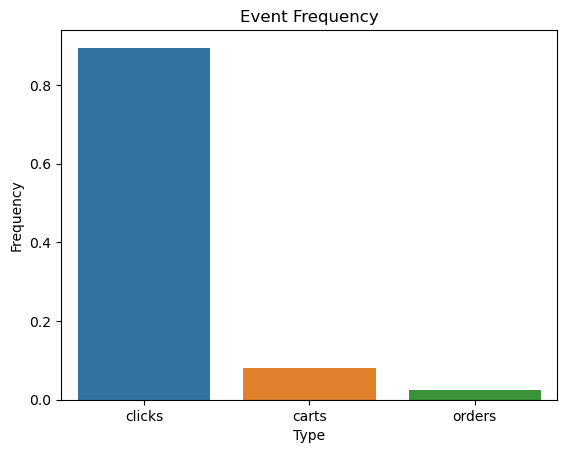

In [7]:
# Event Frequency
event_counts = train['type'].value_counts()
total_events = event_counts.sum()

sns.barplot(x=event_counts.index.map(id2type), y=event_counts.values / total_events)
plt.title('Event Frequency')
plt.ylabel('Frequency')
plt.xlabel('Type')
plt.savefig('event_frequency.png')

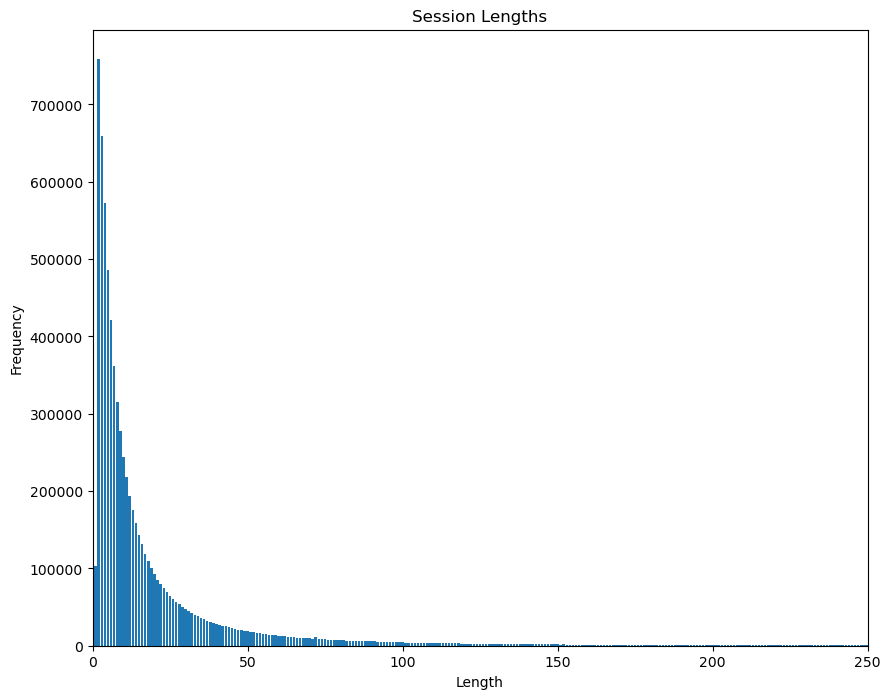

In [8]:
# Session Lengths
session_lengths = train['session'].value_counts()
lengths_counts = session_lengths.value_counts()

plt.figure(figsize=(10,8))
# sns.barplot(x=lengths_counts.index, y=lengths_counts.values)
plt.bar(lengths_counts.index, lengths_counts.values)
plt.title('Session Lengths')
plt.ylabel('Frequency')
plt.xlabel('Length')
plt.xlim(0, 250)
plt.savefig('session_lengths.png')

In [9]:
session_lengths = train['session'].value_counts()
print(session_lengths.mean())

20.13845501925582


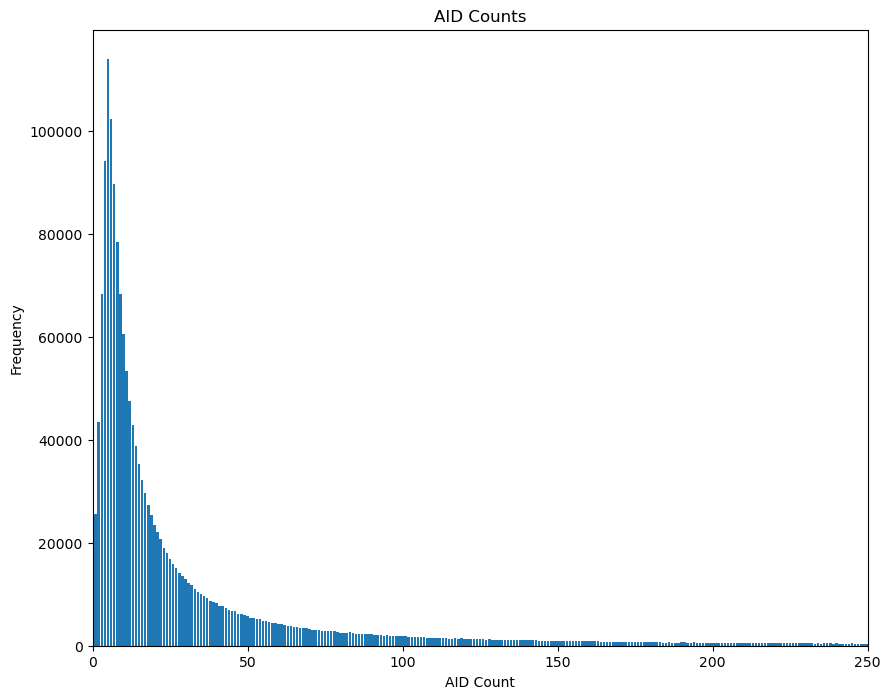

In [10]:
# Frequency of aids
aid_freqs = train['aid'].value_counts()
freqs_counts = aid_freqs.value_counts()

plt.figure(figsize=(10,8))
# sns.barplot(x=aid_freqs.index[:500], y=aid_freqs.values[:500])
plt.bar(freqs_counts.index, freqs_counts.values)
plt.title('AID Counts')
plt.ylabel('Frequency')
plt.xlabel('AID Count')
plt.xlim(0, 250)
plt.savefig('aid_freqs.png')

In [11]:
# # Frequency of aids
# aid_freqs = train['aid'].value_counts().sort_index()

# plt.figure(figsize=(10,8))
# sns.barplot(x=aid_freqs.index[:60], y=aid_freqs.values[:60])
# # plt.bar(aid_freqs.index[:500], aid_freqs.values[:500])
# plt.title('AID Frequencies')
# plt.ylabel('Frequency')
# plt.xlabel('AID')
# plt.xlim(0, 50)
# plt.savefig('aid_freqs.png')